# Bernoulli and Binomial Distribution

## Introduction

Now that you have started calculating your own probabilities, let's take it a little step further and talk about the notion of a *probability model*. Broadly speaking, a probability model is the mathematical representation of a random phenomenon. We have seen mathematical representations of probability before, for example, you may recall this expression for probability of a certain event when having equally likely outcomes:

$P(E)= \dfrac{| E|}{|S|}$ 

In this section, we'll discuss 2 foundational probability distributions that are extremely useful and have an endless amount of applications: the Bernoulli distribution the Binomial distribution.

## Objectives

You will be able to:

- Understand that the Bernoulli experiment is one of the basic distributions
- Understand how a Bernoulli experiment can describe a coin flip, and that it can be extended to other applications
- Learn what it means when events are independent
- Learn that the binomial distribution models a sequence of independent Bernoulli events
- Understand how to use NumPy to randomly generate Binomial and Bernoulli trials
- Use Matplotlib to show the output of generated Binomial and Bernoulli trials


## The Bernoulli or Binary distribution

In the previous sections, we discussed several probability theory situations regarding throwing a dice, or throwing a coin. The Bernoulli distribution formalizes the idea of a coin flip. 

The Bernoulli experiment is a simple experiment in which we have a binary
outcome: 0-1, succes-failure, head-tail, etc. 

As the Bernoulli experiment has two potential outcomes: 0 or 1, and if we would model a coin flip, we could say that 0 means heads, and 1 tails. With a fair coin, obtaining either value when performing a coin toss would have an assigned probability of 0.5. The Bernoulli experiment can also describe events with different probability structures. For example, let's say that the chance of scoring a penalty goal is 80%. Where $Y$ is the penalty outcome:

$Y = Bernoulli(p)$ and $p=P(Y=1)=0.8$.

So we say that the Bernoulli distribution has one parameter $p$.

Note how the Bernoulli distribution describes a single coin flip, a single penalty shot, etc. What if we repeat this process multiple times and are interested in the probability to obtain a certain numbers of 1s/successes/tails? This process is described by the **binomial distribution**.

## The Binomial distribution

The binomial distribution describes the process of performing several (denoted by $n$) *independent* Bernoulli trials. So what does it mean that the trials are independent?

When we say that events are **independent, this means that an event is not affected by previous events**.

Applying this to our penalty goal example, this means that the assumption is that, when a soccer player misses a penalty and then tries again, the fact that he missed it the previous time does not affect his chances of hitting it now: the probability is still 80% ($p=0.8$)!


As we have a repeated Bernoulli experiment, the binomial distribution has two parameters: $p$ (the success probability) and $n$ (the amount of times the experiment is repeated). We say that random variable $Y$ follows a Binomial distribution:
$ Y = bin(n, p)$. 


Now we're interested in finding an expression that gives us the probability to find a each possible amount of successes $k$ between 0 and n. Going back to our goal penalties example, imagine we still have $p = 0.8$, but have 3 consecutive penalty shots. What is:
- $P(Y=0)$ (or the soccer player doesn't score a single time)?
- $P(Y=1)$ (or the soccer player scores exactly once)?
- $P(Y=2)$ (or the soccer player scores exactly twice)?
- $P(Y=3)$ (or the soccer player scores exactly three times)?


Calculating $P(Y=0)$ is pretty easy, it's simply $0.2*0.2*0.2$, so 0.008. 

Getting to $P(Y=1)$ is a little bit more complicated. It's essentially $0.8*0.2*0.2+0.2*0.8*0.2+ 0.2*0.2*0.8$, so it's the probability of scoring during the first shot, or the second shot, or the third shot. So essentially, its $3*(0.8*0.2*0.2)$. You can see how combinatorics play a role here! The general formula is given as follows:

$$ P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


Where $k$ denites the number of successes. Applying this on $P(Y=2)$ we get $ P(Y=2)= \binom{3}{2} 0.8^2(1-0.8)^{(3-2)} = \dfrac{3!}{2!1!}*0.8^2 * 0.2^1 = 3*0.8^2*0.2$. Note how

- $P(Y=0)=0.008$
- $P(Y=1)=0.096 $ 
- $P(Y=2)=0.384 $ 
- $P(Y=3)=0.512$ 


Note how they sum to one, which is exactly what's expected!

## Use NumPy to randomly generate Binomial and Bernoulli trials.

We've come across random sampling before, but we'll formalize this in this section. 
When we're performing random sampling, what we're basically doing is selecting a sample from a statistical population in such a way that every possible sample has a predetermined probability of being selected.

Applied to our example, imagine that 1 represents scoring a penalty and 0 represents missing. If $p = 0.8$, if you'll do 100 penalties in a row, you'd expect to have about 80 hits. The reason why it's not exactly 80 is because uncertainty plays a role, and this is exactly what you can model using the NumPy random library! Below, we're using `np.random.binomial` to generate how many successful penalties we have when shooting 100 penalties.

In [3]:
import numpy as np
np.random.seed(200) # set a seed to get the same results
np.random.binomial(100, 0.8)

73

Now, let's try this again:

In [4]:
np.random.binomial(100, 0.8)

83

And again:

In [5]:
np.random.binomial(100, 0.8)

79

You can see how this number changes slightly every time and fluctuates around 100. If you'd repeat this many times, you could expect that the amount of successes will converge to 80. Let's illustrate with the for loop below which repeats this 500 times:

In [6]:
iteration = []
for loop in range(500):
    iteration.append(np.random.binomial(100, 0.8))
    np_it = np.array(iteration)

In [7]:
sum(np_it)/500

79.76

Now we'll use `np.random.binomial` to illustrate out findings regarding penalties above. Let's keep track of how many times we observe 0 goals, 1 goal, 2 goals, and 3 goals and find the probabilities through simulation. Now, lets repeat our experiment 10000 times.

In [8]:
n = 10000
iteration = []
for loop in range(n):
    iteration.append(np.random.binomial(3, 0.8))
    np_it = np.array(iteration)

np_it stores the total penalty goal outcomes (0 to 3) for each of the 10000 iterations. Now using `np.unique()` with the optional argument `return_counts`, you get the levels of the $k$ as in your Binomial formula along with how often they occurred when running 10000 trials.

In [9]:
values, counts = np.unique(np_it, return_counts=True)
print(values)
print(counts)

[0 1 2 3]
[  85  937 3754 5224]


## Visualize these results

Now, let's use these results and visualize them in terms of fractions. You'll see that these fractions approximations of the values as calculated in the Binomial distribution formula. 

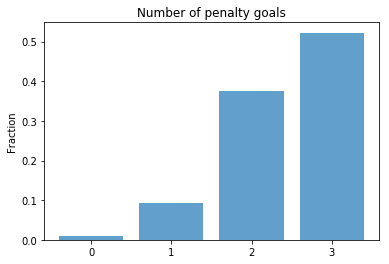

In [11]:
import matplotlib.pyplot as plt
plt.bar(values, counts/10000, align='center', alpha=0.7)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('Number of penalty goals');

## Summary

In this lecture you learned about the Bernoulli and Binomial distributions, you learned how to use the formula for the Binomial distribution, and how to simulate Binomial trials to get to approximations of the Binomial distribution probabilities.